In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
members = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/members_v3.csv')

In [4]:
transactions = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/transactions_v2.csv')

In [5]:
churn = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/train_v2.csv')

In [6]:
usage_log = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/user_logs_v2.csv')

In [7]:
usage_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


In [8]:
usage_log.isna().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [9]:
usage_log.groupby('msno')['date'].count().nlargest(10)

msno
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=    31
++4cUL0b9CfW8cj0A/wfSxQc4k4fcVtWcLqk2UOdpKs=    31
++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=    31
++BW1PJYU5OZi3n3+IDLiU+d1IL1VE/GLx6p64TDs6U=    31
++IjWFeERbYk9tNN+E1uleDRE9YBTRm8LTPwhwCyVIQ=    31
++MudIvjB4P6fsqTIp5lB1WV4p5vm9hEg2C7oTqfJP8=    31
++NdP5GS9hxpyOaig+eMIWJ1gw8VmC85qTsEG5YMs+w=    31
++QRDV09vtw2al6TIndC5B4wqdyYYG9YhPFjCUy/FwE=    31
++VJ+Lla5fcEpsJWCHx7i7x7LBdGkBiFTz3oBH3THOc=    31
++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=    31
Name: date, dtype: int64

In [10]:
usage_log.groupby('msno')['date'].count().nsmallest(10)

msno
++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=    1
++IkcAfu6QXdeeyOI7yUXyGpXv2AtUFUK2SZNYXWZmg=    1
++JHjhFuSV7upQUju29UmOHStYHmNiW5th0xEyUGW8s=    1
++N444M3mFbtGdHmPFJaYtvh/e6HSQgIF+OyMGwNHs4=    1
++WzwUilDTwylIR3EtdSaXH3iWnmVuWNyq3iiIgCSsM=    1
++XNdJjfGpF5k/o2548rYGpi9Xly1LcoTt3N6e0Xw8o=    1
++aTQuzrlR6QCrMNRtQWIGc/oM7oDNYk7uAzgMoAcms=    1
++am6f+rLDE3gjQM7pKLVAthwCgaI46WHbTNuKtgpbI=    1
++gzbSoJZRJod/mZc38IMuXdshlDpaIS8TU7kiTFXIk=    1
++l1NsGiDeD9s8ftzYUwhhMuayijLHMHhcO6BNgOMe4=    1
Name: date, dtype: int64

In [11]:
usage_log.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


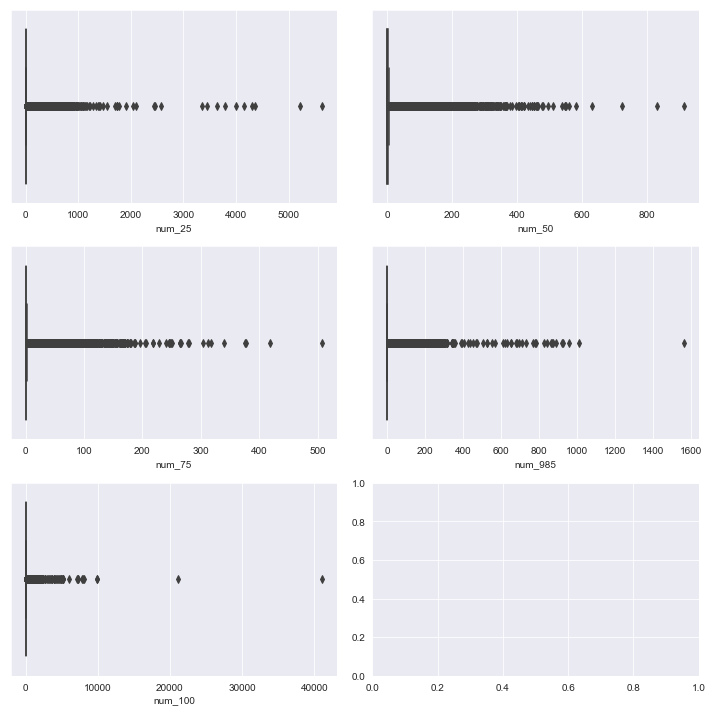

In [12]:
fig, axes = plt.subplots(3, 2, squeeze=False, figsize=(10,10))
axes = axes.flatten()

sns.boxplot(usage_log['num_25'], ax=axes[0])
sns.boxplot(usage_log['num_50'], ax=axes[1])
sns.boxplot(usage_log['num_75'], ax=axes[2])
sns.boxplot(usage_log['num_985'], ax=axes[3])
sns.boxplot(usage_log['num_100'], ax=axes[4])
plt.tight_layout()

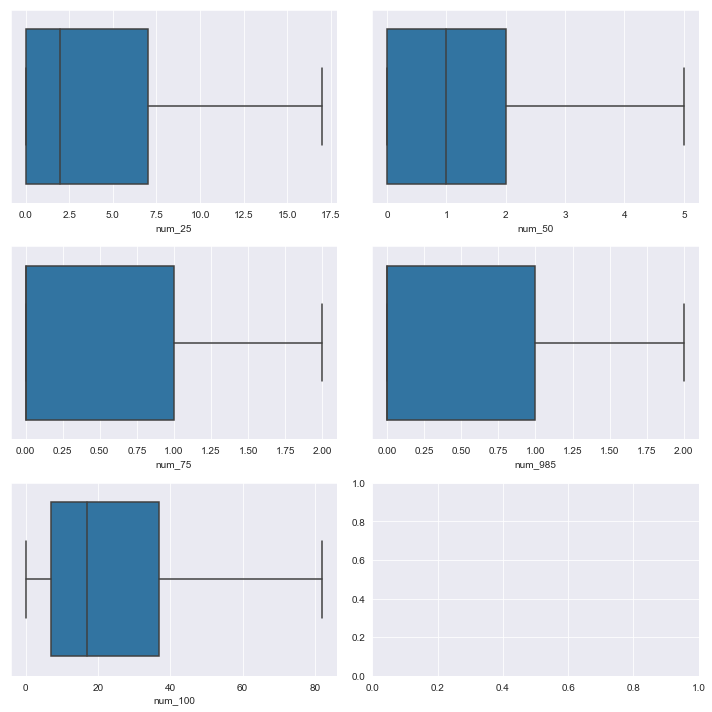

In [13]:
fig, axes = plt.subplots(3, 2, squeeze=False, figsize=(10,10))
axes = axes.flatten()

sns.boxplot(usage_log['num_25'], ax=axes[0], showfliers=False)
sns.boxplot(usage_log['num_50'], ax=axes[1], showfliers=False)
sns.boxplot(usage_log['num_75'], ax=axes[2], showfliers=False)
sns.boxplot(usage_log['num_985'], ax=axes[3], showfliers=False)
sns.boxplot(usage_log['num_100'], ax=axes[4], showfliers=False)
plt.tight_layout()

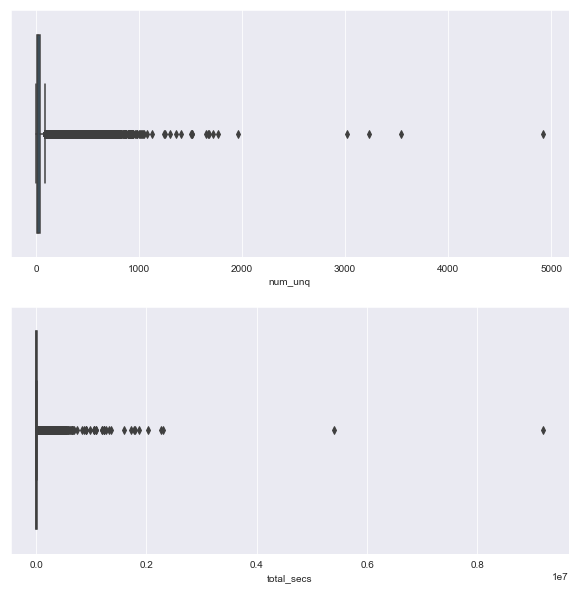

In [14]:
fig, axes = plt.subplots(2, 1, squeeze=False, figsize=(10,10))
axes = axes.flatten()

sns.boxplot(usage_log['num_unq'], ax=axes[0])
sns.boxplot(usage_log['total_secs'], ax=axes[1])

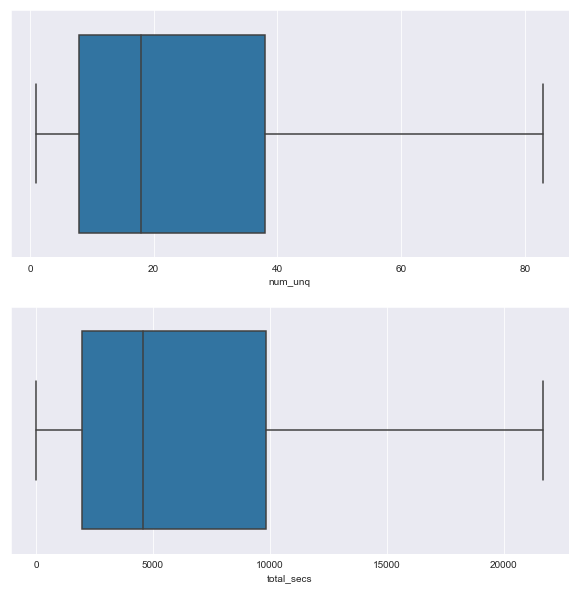

In [15]:
fig, axes = plt.subplots(2, 1, squeeze=False, figsize=(10,10))
axes = axes.flatten()

sns.boxplot(usagme_log['num_unq'], ax=axes[0], showfliers=False)
sns.boxplot(usage_log['total_secs'], ax=axes[1], showfliers=False)

In [16]:
members = pd.merge(members, churn, on='msno', how='outer')

In [17]:
members['is_churn'].count()

970960

In [19]:
members['is_churn'].fillna(0, inplace=True)

In [22]:
user_total_unq = usage_log.groupby('msno')['num_unq'].sum()

In [23]:
user_total_unq.head()

msno
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=    530
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=    885
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=    468
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=    828
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=    230
Name: num_unq, dtype: int64

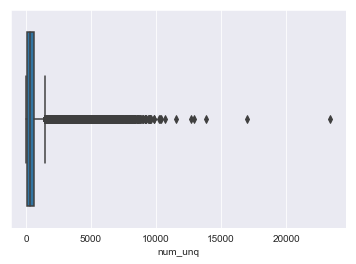

In [24]:
sns.boxplot(user_total_unq)

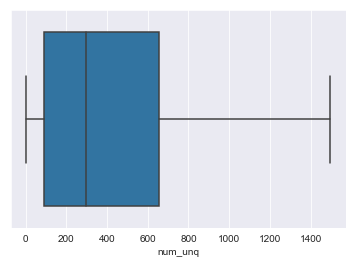

In [25]:
sns.boxplot(user_total_unq, showfliers=False)

In [30]:
members.count()

msno                      6879466
city                      6769473
bd                        6769473
gender                    2339968
registered_via            6769473
registration_init_time    6769473
is_churn                  6879466
dtype: int64

In [31]:
## Merge the total unique songs per member
members = pd.merge(members, user_total_unq.to_frame(), on='msno', how='outer')

In [32]:
members.count()

msno                      6879487
city                      6769473
bd                        6769473
gender                    2339968
registered_via            6769473
registration_init_time    6769473
is_churn                  6879466
num_unq                   1103894
dtype: int64